# Georgiou AIF

In [1]:
import os
import numpy
from matplotlib import pyplot as plt
from matplotlib.transforms import offset_copy
import csv
import seaborn as sns
import pandas as pd
import json
from pathlib import Path

## Background
The Georgiou AIF is a population AIF derived from DCE data of 39 breast cancer patients in the paper of Georgiou et al. (Magn Reson Med, 2018). 
The test data is based on the original data submitted with the manuscript (mrm27524-sup-0002-figs2.xlsx)


## Test data

The test data is based on the original data submitted with the manuscript (mrm27524-sup-0002-figs2.xlsx). This data is labeled as 'Original_AIF'.  
In addition AIFs with varying temporal resolutions (0.5, 1, 2, 2.5, 5, 7.5 s) were tested by interpolating the original time curve.  
As we don't expect many errors in implementing the population AIFs, the tolerances were set tight: absolute + relative = 0.0001 mM + 0.01.


## Import data

In [2]:
# Load the meta data
meta = json.load(open("../test/results-meta.json"))

In [3]:
# Loop over each entry and collect the dataframe
df = []
for entry in meta:
    if (entry['category'] == 'PopulationAIF') & (entry['method'] == 'Georgiou') :
        fpath, fname, category, method, author = entry.values()
        df_entry = pd.read_csv(Path(fpath, fname)).assign(author=author)
        df.append(df_entry)
    
# Concat all entries
df = pd.concat(df)

In [4]:
# label data source
df['source']=''
df.loc[df['label'].str.contains('original'),'source']='original'
df.loc[df['label'].str.contains('temp_res'),'source']='temp_res' 

author_list = df.author.unique()
no_authors = len(author_list)

## Results

### Original AIF

First we plot the original AIF time curve from the paper and the output from the code contributions.  
There are no differences between outputs of the contributions and the reference AIF.

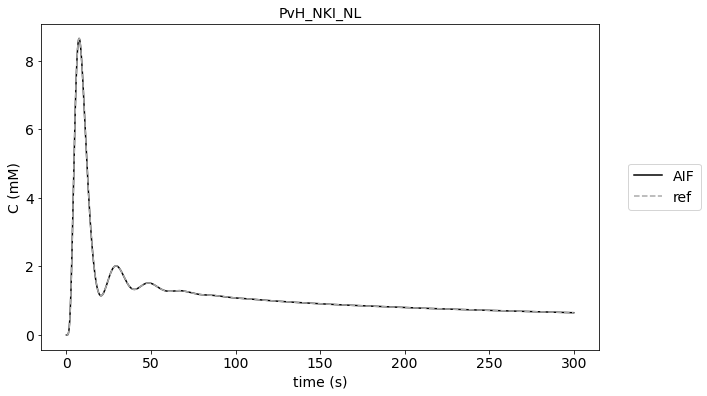

In [5]:
data_original = df[(df['source']=='original')]  

fig, axs = plt.subplots(1, no_authors, sharey='none',figsize=(10,6))

for current_author in range(no_authors):
    plt.subplot(1,no_authors,current_author+1)
    subset_data = data_original[data_original['author'] == author_list[current_author]]
    plt.plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
    plt.plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')
    
    plt.title(author_list[current_author], fontsize=14)
    plt.xlabel('time (s)', fontsize=14)
    plt.ylabel('C (mM)',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=14);


### Different temporal resolutions

This test data was added to check whether the contributions can work with temporal resolutions different from the original reference.
There are no errors for various temporal resolutions.

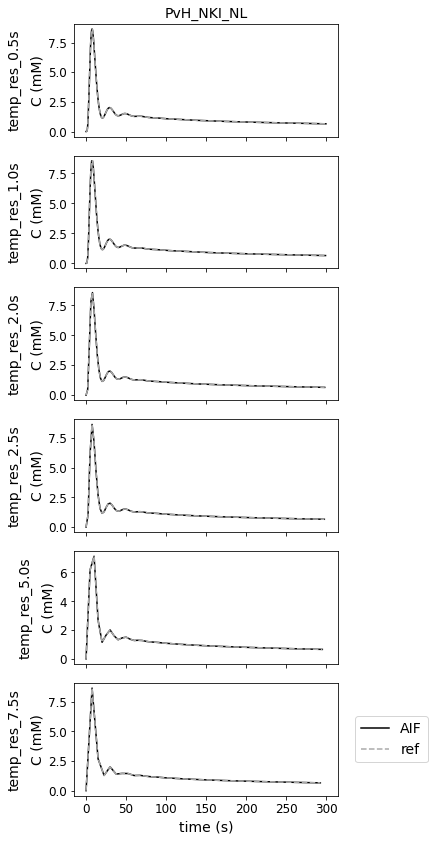

In [6]:
data_res = df[(df['source']=='temp_res')]
res_list = data_res.label.unique()
no_res = len(res_list)

fig, ax = plt.subplots(no_res, no_authors, sharex='col', sharey='row', figsize=(6,12))


if no_authors > 1:
    for current_res in range(no_res):
        for current_author in range(no_authors):
            subset_data = data_res[(data_res['author'] == author_list[current_author]) & (data_res['label'] == res_list[current_res])]
            ax[current_res,current_author].plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
            ax[current_res,current_author].plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')

            if current_res == 0:
                ax[current_res,current_author].set_title(author_list[current_author], fontsize=14)
            if current_author == 0:
                ax[current_res,current_author].set_ylabel('C (mM)', fontsize=14)
            if current_res == no_acq-1:
                ax[current_res,current_author].set_xlabel('time (s)', fontsize=14)
            ax[current_res,current_author].tick_params(axis='x', labelsize=12)
            ax[current_res,current_author].tick_params(axis='y', labelsize=12)

        ax[no_res-1,no_authors-1].legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=14)
    
    # add extra labels for rows
    pad = 5
    for a, row in zip(ax[:,0], res_list):
        a.annotate(row, xy=(0, 0.5), xytext=(-a.yaxis.labelpad - pad, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                ha='right', va='center', rotation=90, fontsize=14)
    
else:
    for current_res in range(no_res):
        subset_data = data_res[(data_res['author'] == author_list[current_author]) & (data_res['label'] == res_list[current_res])]
        ax[current_res].plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
        ax[current_res].plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')
        ax[current_res].set_ylabel('C (mM)', fontsize=14)
        
        if current_res == 0:
            ax[current_res].set_title(author_list[current_author], fontsize=14)         
        if current_res == no_res-1:
            ax[current_res].set_xlabel('time (s)', fontsize=14)
        ax[current_res].tick_params(axis='x', labelsize=12)
        ax[current_res].tick_params(axis='y', labelsize=12)

    ax[no_res-1].legend(bbox_to_anchor=(1.04,0.5), loc="center left", fontsize=14)
        
    
    # add extra labels for rows
    pad = 5
    for a, row in zip(ax, res_list):
        a.annotate(row, xy=(0, 0.5), xytext=(-a.yaxis.labelpad - pad, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                ha='right', va='center', rotation=90, fontsize=14)
        


fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

## Notes
As there is currently only one implementation where a bolus arrival time was not implemented, we did not test this aspect yet for the Georgiou AIF.

### References

Georgiou et al. "A functional form for a representative individual arterial input function measured from a population using high temporal resolution DCE MRI" Magn Reson Med (2018), DOI:  https://doi.org/10.1002/mrm.27524